In [11]:
%matplotlib inline
import requests
from matplotlib.patches import Circle, Rectangle, Arc
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns

In [12]:
stephen_curry_shots = pd.read_csv('/Users/jaycohen/Documents/NYCDSA/Capstone_Project/NBA_Shot_Chart_Project/data/Stephen_Curry_shots.csv')

In [13]:
stephen_curry_shots

,Unnamed: 0,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Original_Index
0,59200,Shot Chart Detail,21500003,6,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,56,Made Shot,Cutting Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,12,31,1,1,20151027,GSW,NOP,59200
1,59201,Shot Chart Detail,21500003,9,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,29,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,26,-176,195,1,0,20151027,GSW,NOP,59201
2,59202,Shot Chart Detail,21500003,14,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,34,Missed Shot,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,9,1,0,20151027,GSW,NOP,59202
3,59203,Shot Chart Detail,21500003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,13,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,27,-197,193,1,1,20151027,GSW,NOP,59203
4,59204,Shot Chart Detail,21500003,36,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,Made Shot,Running Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,-4,8,1,1,20151027,GSW,NOP,59204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,60793,Shot Chart Detail,21501227,322,201939,Stephen Curry,1610612744,Golden State Warriors,3,5,43,Made Shot,Reverse Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,20,16,1,1,20160413,GSW,MEM,60793
1582,60794,Shot Chart Detail,21501227,350,201939,Stephen Curry,1610612744,Golden State Warriors,3,2,43,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,30,4,303,1,0,20160413,GSW,MEM,60794
1583,60795,Shot Chart Detail,21501227,364,201939,Stephen Curry,1610612744,Golden State Warriors,3,1,27,Made Shot,Cutting Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,2,10,21,1,1,20160413,GSW,MEM,60795
1584,60796,Shot Chart Detail,21501227,372,201939,Stephen Curry,1610612744,Golden State Warriors,3,0,32,Missed Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,209,183,1,0,20160413,GSW,MEM,60796


In [14]:
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

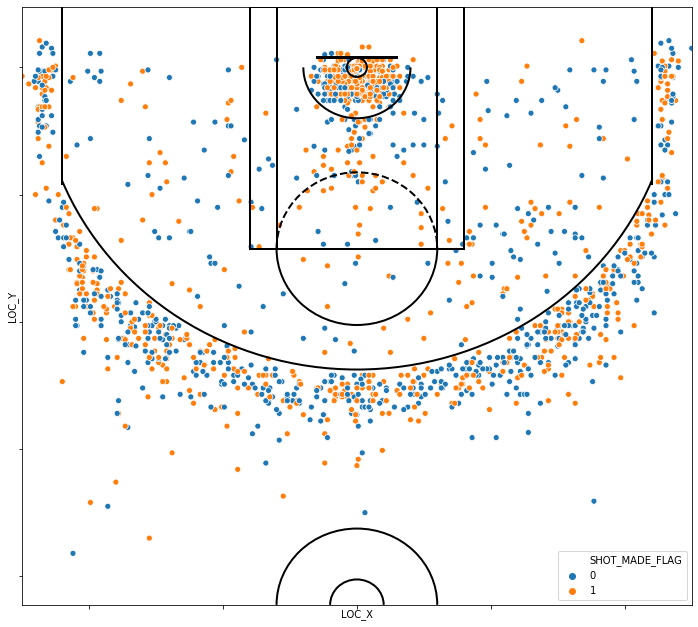

In [15]:
plt.figure(figsize=(12,11))
sns.scatterplot(x=stephen_curry_shots.LOC_X, y=stephen_curry_shots.LOC_Y, hue=stephen_curry_shots.SHOT_MADE_FLAG)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

In [16]:
stephen_curry_shots['SHOT_ZONE_BASIC'].unique()

array(['Restricted Area', 'Above the Break 3', 'Mid-Range',
       'In The Paint (Non-RA)', 'Right Corner 3', 'Left Corner 3'],
      dtype=object)

In [17]:
stephen_curry_shots['SHOT_ZONE_AREA'].unique()

array(['Center(C)', 'Left Side Center(LC)', 'Right Side Center(RC)',
       'Left Side(L)', 'Right Side(R)'], dtype=object)